In [1]:
from utils import *

2024-03-25 02:22:38.287967: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Segmentation Models: using `keras` framework.


## Data Prep

In [2]:
# img_num = random.randint(0, num_images-1)
# img_num

In [3]:
# plot_dataset(img_num)

In [4]:
#Make sure the generator is working and that images and masks are indeed lined up. 
#Verify generator.... In python 3 next() is renamed as __next__()
# x = train_img_gen.take(20)
# plot_process_data(x)

In [7]:
IMG_HEIGHT = 256
IMG_WIDTH = 256
batch_size = 16

In [10]:

train_img_path = "/scratch/gza5dr/IrrigationTypeDetection/Experinments/Data/train_images/train_new"
train_mask_path = "/scratch/gza5dr/IrrigationTypeDetection/Experinments/Data/train_masks/train_new"
train_img_gen = trainGenerator(train_img_path, train_mask_path,batch_size, num_class=3,seed=42,img_size=(IMG_HEIGHT,IMG_HEIGHT))

val_img_path = "/scratch/gza5dr/IrrigationTypeDetection/Experinments/Data/val_images/val_new"
val_mask_path = "/scratch/gza5dr/IrrigationTypeDetection/Experinments/Data/val_masks/val_new"
val_img_gen = trainGenerator(val_img_path, val_mask_path, batch_size, num_class=3,seed=42,img_size=(IMG_HEIGHT,IMG_HEIGHT))

(256, 256)
(256, 256)


## inceptionv3 with Unet

In [9]:
model = train_model('inceptionv3',train_img_gen,val_img_gen,IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS)

Epoch 1/100


2024-03-25 02:31:31.841461: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x561e91fc6a70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-25 02:31:31.841494: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2024-03-25 02:31:33.191886: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-25 02:31:36.939518: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2024-03-25 02:32:20.731507: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


43/43 - 84s - 2s/step - accuracy: 0.3487 - f1_score: 0.2876 - f1_score0: 0.4205 - f1_score1: 0.0945 - f1_score2: 0.3477 - iou: 0.2110 - loss: 1.2709 - precision: 0.3477 - precision_0: 0.2979 - precision_1: 0.2680 - precision_2: 0.5208 - recall: 0.1879 - recall_0: 0.7318 - recall_1: 0.0579 - recall_2: 0.2614 - val_accuracy: 0.3058 - val_f1_score: 0.2312 - val_f1_score0: 0.3636 - val_f1_score1: 0.0089 - val_f1_score2: 0.3211 - val_iou: 0.1996 - val_loss: 1.1007 - val_precision: 0.0000e+00 - val_precision_0: 0.2684 - val_precision_1: 0.2094 - val_precision_2: 0.3626 - val_recall: 0.0000e+00 - val_recall_0: 0.5787 - val_recall_1: 0.0045 - val_recall_2: 0.2927
Epoch 2/100
43/43 - 52s - 1s/step - accuracy: 0.3638 - f1_score: 0.3011 - f1_score0: 0.4223 - f1_score1: 0.0925 - f1_score2: 0.3885 - iou: 0.2174 - loss: 1.2016 - precision: 0.3733 - precision_0: 0.2992 - precision_1: 0.2755 - precision_2: 0.5571 - recall: 0.1837 - recall_0: 0.7331 - recall_1: 0.0560 - recall_2: 0.2992 - val_accuracy:

In [8]:
model.save_weights('inceptionv3.weights.h5')

In [ ]:
# model = load_model("efficientnetb4.weights.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


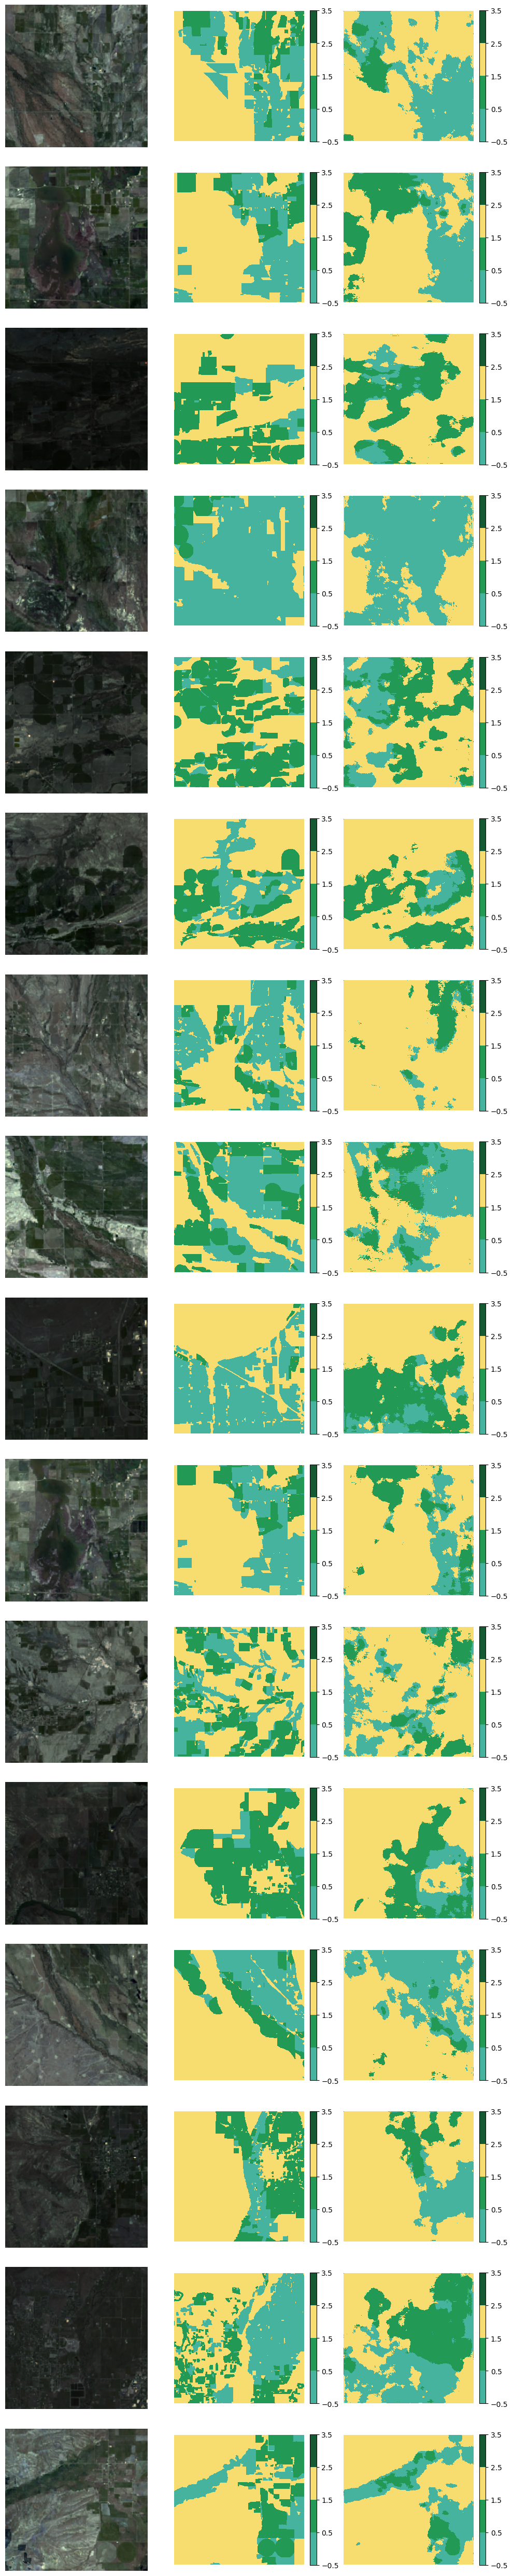

In [13]:
# import matplotlib.pyplot as plt
# import numpy as np
# import tensorflow as tf
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch
# Assuming model, valid_img_gen are defined, and weights are loaded
x = val_img_gen.take(5)
fig, axs = plt.subplots(16, 3, figsize=(10, 50))
class_colors = ['#45B39D', '#229954', '#F7DC6F','#145A32']  # Example for 3 classes
custom_cmap = ListedColormap(class_colors)
class_labels = [0, 1, 2,3] 
boundaries = np.arange(min(class_labels) - 0.5, max(class_labels) + 1.5, 1)
norm = BoundaryNorm(boundaries, custom_cmap.N, clip=True)
class_names = ['Flood','Sprinkler','NonIrr']
cnt = 0
legend_handles = [Patch(color=color, label=label) for color, label in zip(class_colors, class_names)]
i=0

for images, labels in x:
    preds = model.predict(images)
    for i in range(16):
        image = images[i].numpy()
        label = labels[i].numpy()  # Adjusted for direct numpy conversion
        masks = np.argmax(label, axis=-1)
        pred_mask = np.argmax(preds[i], axis=-1)

        # Display the image
        im0 = axs[i][0].imshow(image[:,:,:3])
        # Display the true mask
        im1 = axs[i][1].imshow(masks,cmap=custom_cmap, norm=norm, interpolation='nearest')
        # Display the predicted mask
        im2 = axs[i][2].imshow(pred_mask,cmap=custom_cmap, norm=norm, interpolation='nearest')

        # Remove ticks
        axs[i][0].axis('off')
        axs[i][1].axis('off')
        axs[i][2].axis('off')

        # Add colorbars
        # For the true mask
        fig.colorbar(im1, ax=axs[i][1], fraction=0.046, pad=0.04)
        # For the predicted mask
        fig.colorbar(im2, ax=axs[i][2], fraction=0.046, pad=0.04)

    break  # Since you have a break here, it only goes through the loop once

plt.tight_layout()
plt.show()


### Graphs

#### Loss and Acc Graph

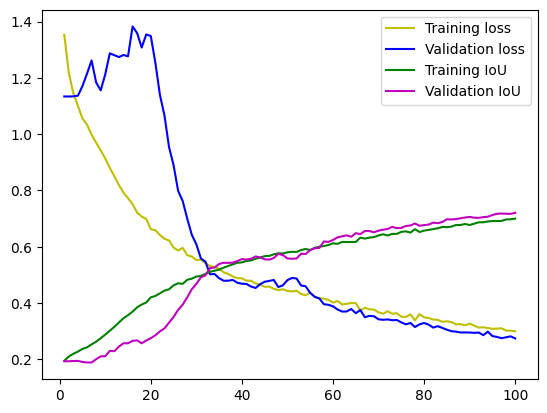

In [25]:
##################################################################
#plot the training and validation IoU and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['iou']
val_acc = history.history['val_iou']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.plot(epochs, acc, 'g', label='Training IoU')
plt.plot(epochs, val_acc, 'm', label='Validation IoU')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
plt.legend()
plt.show()




# plt.title('Training and validation IoU')
# plt.xlabel('Epochs')
# plt.ylabel('IoU')
# plt.legend()
# plt.show()

#####################################################

#### Recall

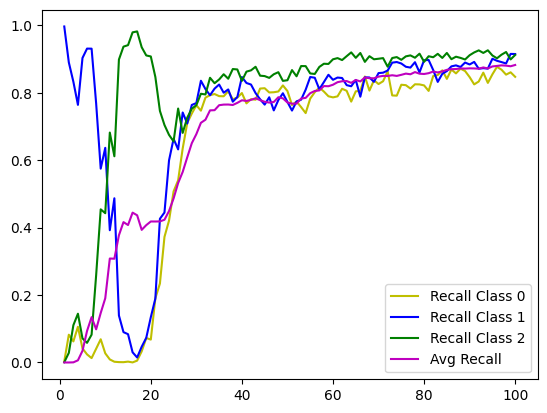

In [27]:
##################################################################
#plot the training and validation IoU and loss at each epoch
recall0 = history.history['val_recall_0']
recall1 = history.history['val_recall_1']
recall2 = history.history['val_recall_2']
recalla = history.history['val_recall']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, recall0, 'y', label='Recall Class 0')
plt.plot(epochs, recall1, 'b', label='Recall Class 1')
plt.plot(epochs, recall2, 'g', label='Recall Class 2')
plt.plot(epochs, recalla, 'm', label='Avg Recall')
plt.legend()
plt.show()

#### Precision

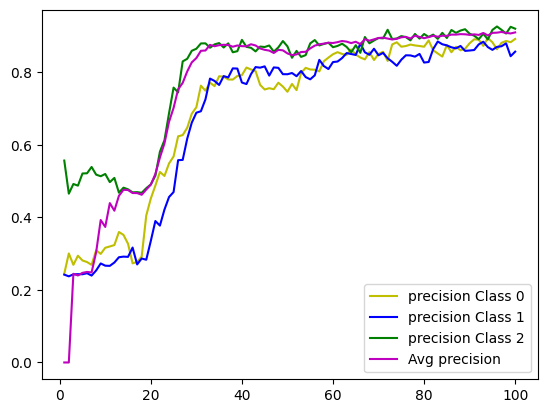

In [30]:
##################################################################
#plot the training and validation IoU and loss at each epoch
precision0 = history.history['val_precision_0']
precision1 = history.history['val_precision_1']
precision2 = history.history['val_precision_2']
precisiona = history.history['val_precision']


epochs = range(1, len(loss) + 1)
plt.plot(epochs, precision0, 'y', label='precision Class 0')
plt.plot(epochs, precision1, 'b', label='precision Class 1')
plt.plot(epochs, precision2, 'g', label='precision Class 2')
plt.plot(epochs, precisiona, 'm', label='Avg precision')
plt.legend()
plt.show()

#### F1

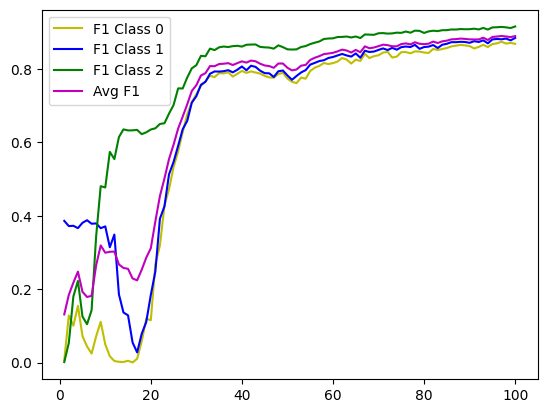

In [29]:
f1_0 = history.history['val_f1_score0']
f1_1 = history.history['val_f1_score1']
f1_2 = history.history['val_f1_score2']
f1s = history.history['val_f1_score']


epochs = range(1, len(loss) + 1)
plt.plot(epochs, f1_0, 'y', label='F1 Class 0')
plt.plot(epochs, f1_1, 'b', label='F1 Class 1')
plt.plot(epochs, f1_2, 'g', label='F1 Class 2')
plt.plot(epochs, f1s, 'm', label='Avg F1')
plt.legend()
plt.show()

In [33]:
x = val_img_gen.take(50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


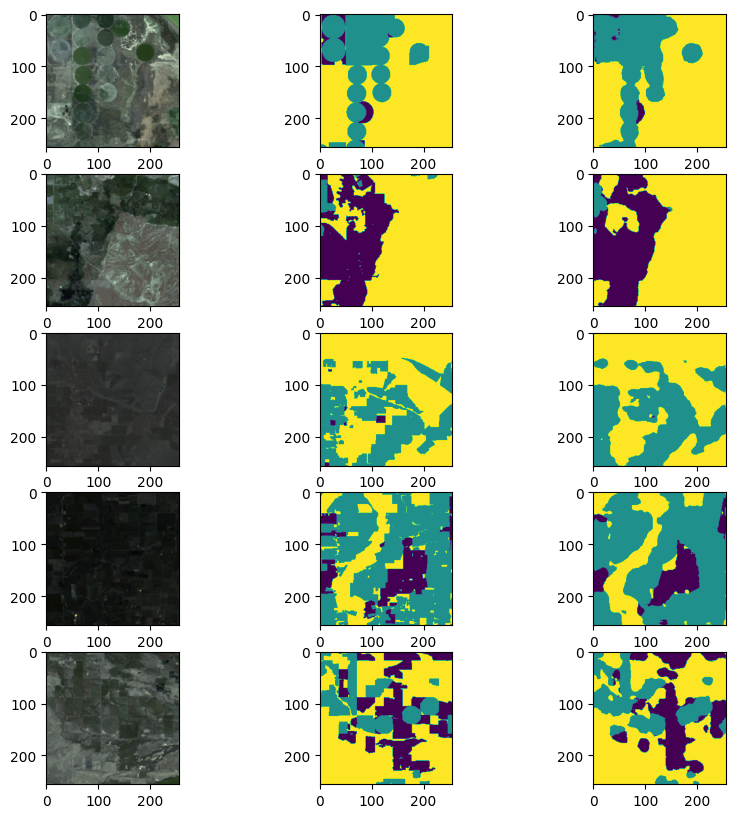

In [40]:
fig,axs = plt.subplots(3,3,figsize=(10, 10))
for images,labels in x:
    # print(images.shape)
    preds=model.predict(images)
    for i in range(5):
        image = images[i]
        masks = np.argmax(labels[i],axis=-1)
        pred_mask = np.argmax(preds[i],axis=-1)
        axs[i][0].imshow(image)
        axs[i][1].imshow(masks)
        axs[i][2].imshow(pred_mask)
    break